<a href="https://colab.research.google.com/github/simoneCanto/SKLEARN_Regressao/blob/main/SKLEARN_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
#Importe o arquivo formato xlsx
aprovados = pd.read_excel("aprovacao_alunos.xlsx")
aprovados.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [8]:
aprovados.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [9]:
aprovados.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [10]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

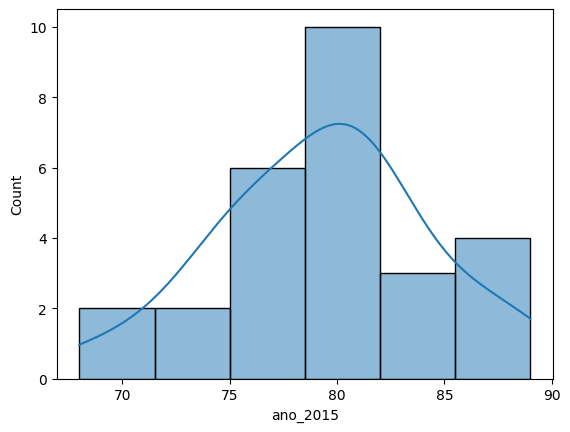

In [11]:
sns.histplot(data=aprovados, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

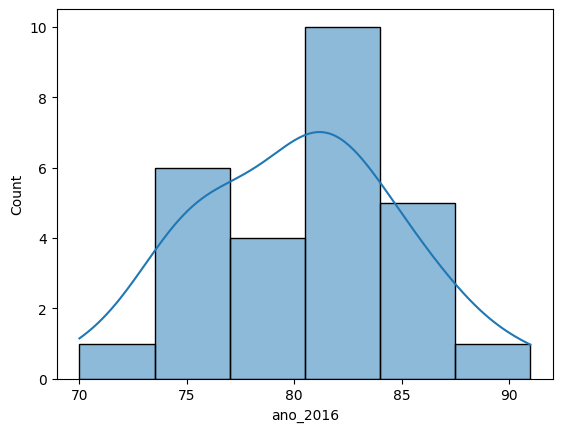

In [12]:
sns.histplot(data=aprovados, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

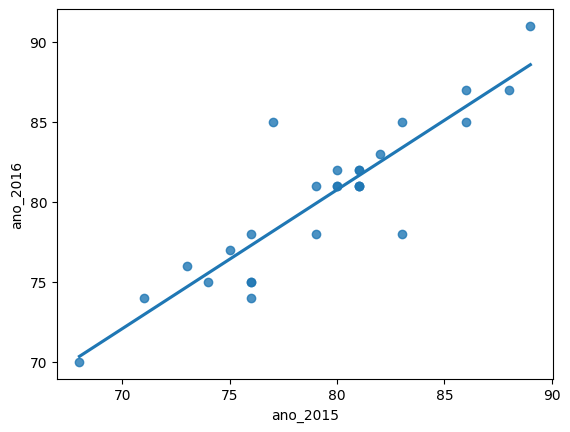

In [13]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            ci = None,
            data = aprovados)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


aprovados_norm = pd.DataFrame(scaler.fit_transform(aprovados), index=aprovados.index, columns=aprovados.columns)

In [17]:
aprovados_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [18]:
aprovados_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<Axes: xlabel='ano_2015', ylabel='Count'>

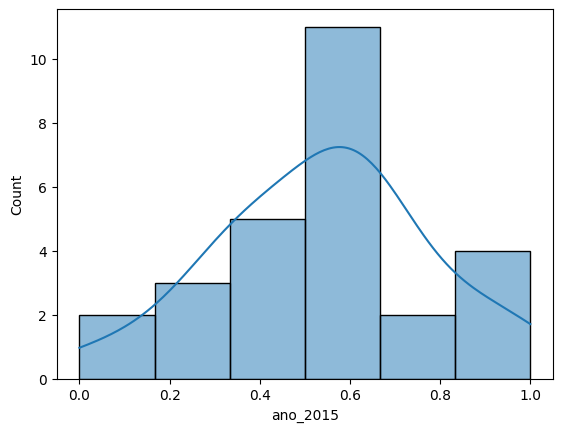

In [19]:
sns.histplot(data=aprovados_norm, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

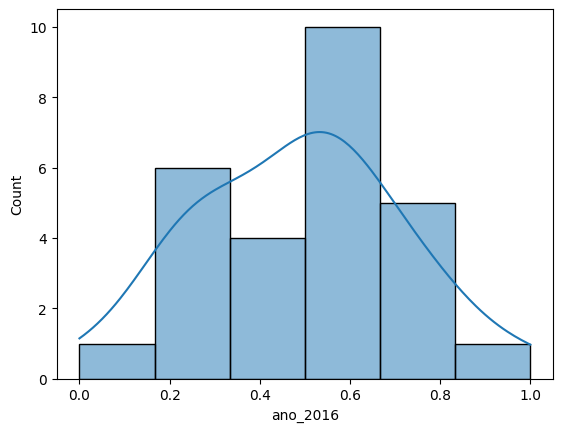

In [20]:
sns.histplot(data=aprovados_norm, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

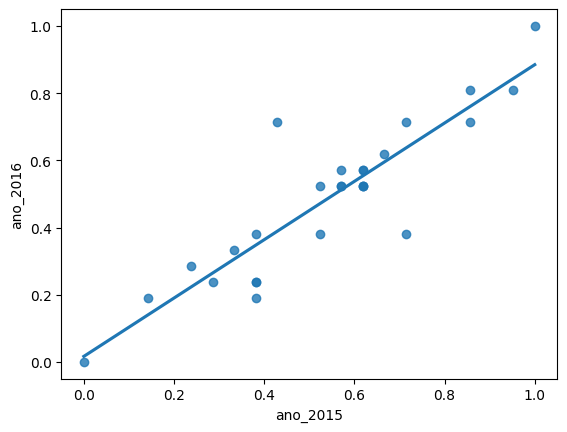

In [21]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            ci = None,
            data = aprovados_norm)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


limite_std = pd.DataFrame(scaler.fit_transform(aprovados), index=aprovados.index, columns=aprovados.columns)

In [23]:
limite_std.head()

,ano_2015,ano_2016
0,-0.478510,1.017926
1,-0.068359,0.172264
2,0.751945,1.017926
3,0.341793,0.383680
4,-1.298813,-0.884813


<Axes: xlabel='ano_2015', ylabel='Count'>

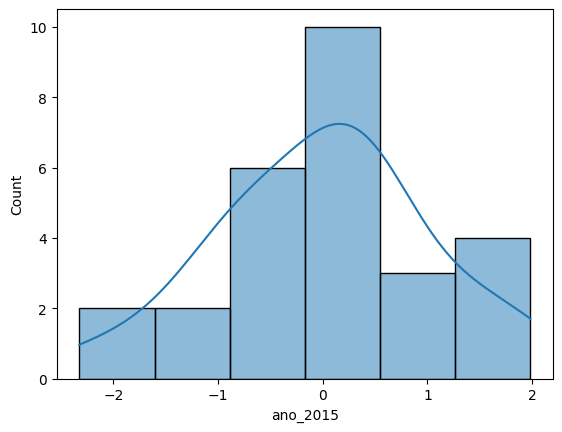

In [24]:
sns.histplot(limite_std, x="ano_2015", kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

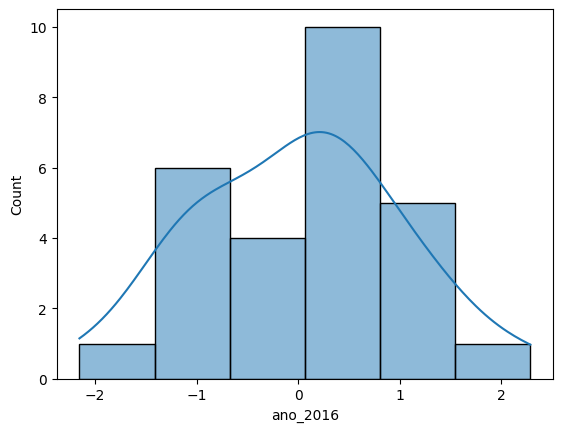

In [25]:
sns.histplot(limite_std, x="ano_2016", kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

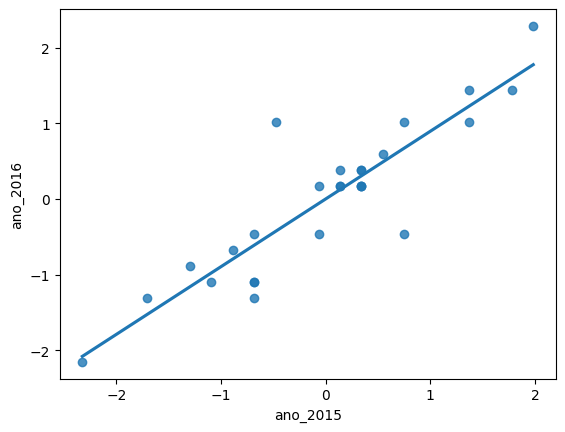

In [26]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            ci = None,
            data = limite_std)

In [27]:
import statsmodels.formula.api as smf

In [29]:
#modelo MRLS
function = 'ano_2016~ano_2015-1'
model = smf.ols(formula=function, data=limite_std).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              104.6
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                    1.32e-10
Time:                        19:13:52   Log-Likelihood:                         -16.520
No. Observations:                  27   AIC:                                      35.04
Df Residuals:                      26   BIC:                                      36.34
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
x = limite_std[["ano_2015"]]

y = limite_std[["ano_2016"]]

In [31]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.7996800852883923


In [33]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.31553042748342464
MSE: 0.2278011349907282
RMSE: 0.47728517155965383


In [34]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2731973404510605
MSE: 0.10413564373468627
RMSE: 0.32270054808550647
